# EMD algorithm - Parameter experiments with a single trip

## Maria Inês Silva
## 29/01/2019

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# extendedMD code
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from extendedMD.motif_viz import create_motif_table, plot_k_motifs, plot_k_multdim_motifs

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'outputs/experiments_v3'))

In [3]:
def load_motif_data(folder):
    ts_1d = pickle.load(open(os.path.join(folder, "ts_1d.p"), "rb"))
    mdl_cost_list = pickle.load(open(os.path.join(folder, "mdl_cost.p"), "rb"))
    motif_point_list = pickle.load(open(os.path.join(folder, "motif_point.p"), "rb"))
    motif_center_list = pickle.load(open(os.path.join(folder, "motif_center.p"), "rb"))
    pattern_list = pickle.load(open(os.path.join(folder, "patterns.p"), "rb"))
    mean_dist = pickle.load(open(os.path.join(folder, "mean_dist.p"), "rb"))
    return ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist

def load_ts_data(folder):
    trip_df = pd.read_pickle(os.path.join(folder, 'trip_df.pkl'))
    multi_dim_ts = trip_df[['ay', 'az']]
    events_ts = trip_df['event_type']
    return multi_dim_ts, events_ts

In [4]:
multi_dim_ts, events_ts = load_ts_data(data_folder)

***

## Experiment 1: Standard approach with adaptive break point in the SAX transformation

In [5]:
folder = os.path.join(output_folder, 'trip_exp1')
ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist = load_motif_data(folder)
df1 = create_motif_table(pattern_list, motif_point_list, mdl_cost_list, mean_dist)
df1.head(10)

,pattern,pattern_len,n_members,mdl_cost,mean_dist
1,[cbd],1,245,47468.7,0.136844
13,[bdc],1,238,47684.3,0.108614
5,[bcd],1,232,47746.9,0.133901
43,[cdb],1,231,48185.5,0.094168
29,[dbc],1,226,48551.7,0.108348
44,[dcb],1,203,49513.7,0.119789
49,[bbe],1,181,50307.8,0.133662
38,[ccc],1,201,50409.3,0.115109
10,[add],1,180,50524.3,0.126842
6,[ebb],1,161,50894.2,0.132001


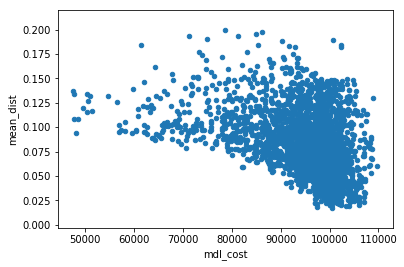

In [6]:
df1.plot.scatter('mdl_cost', 'mean_dist')
plt.show()

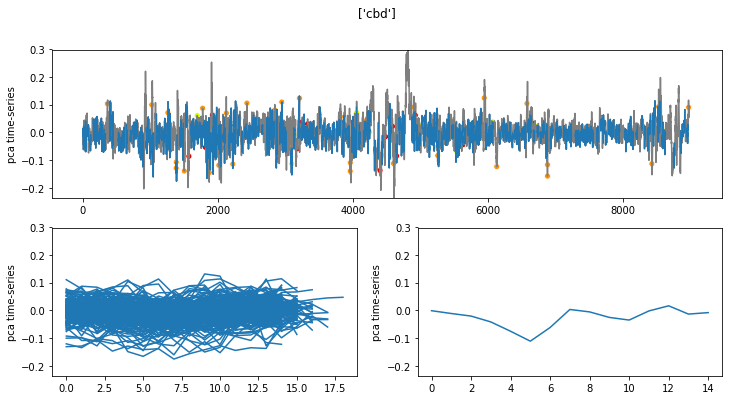

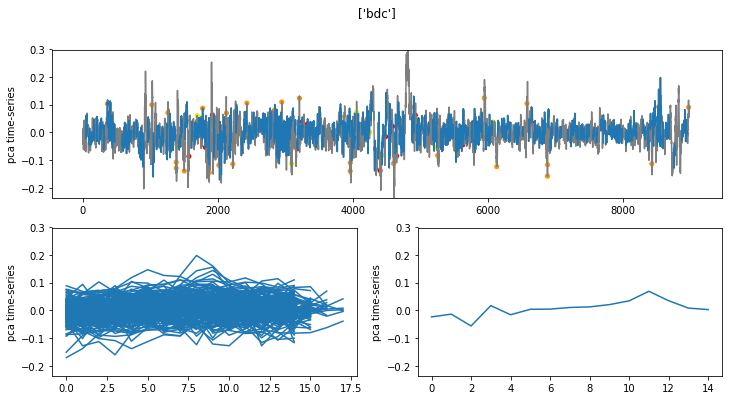

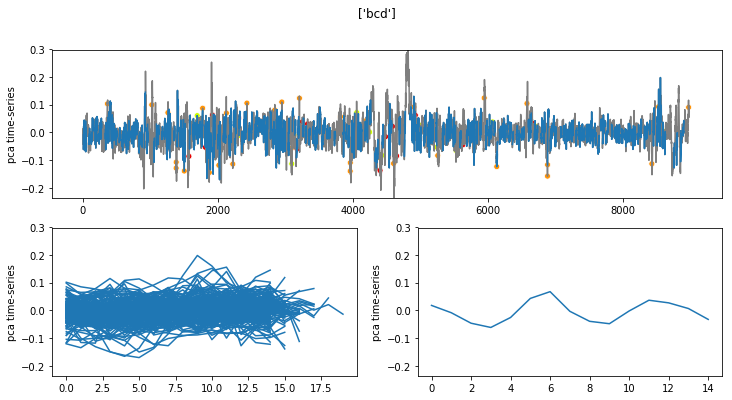

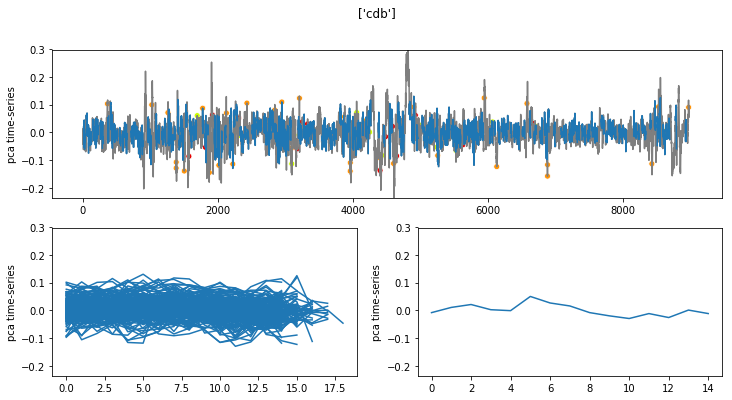

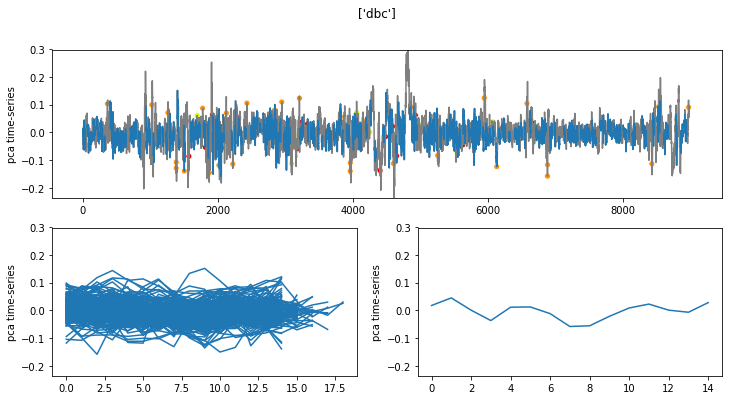

'Plot completed'

In [7]:
plot_k_motifs(5, ts_1d, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)

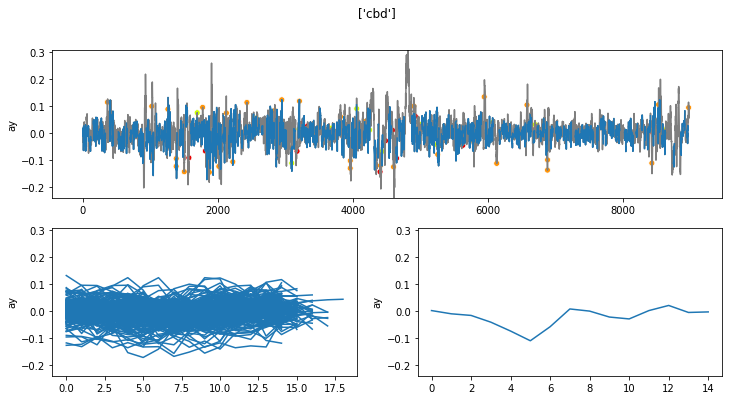

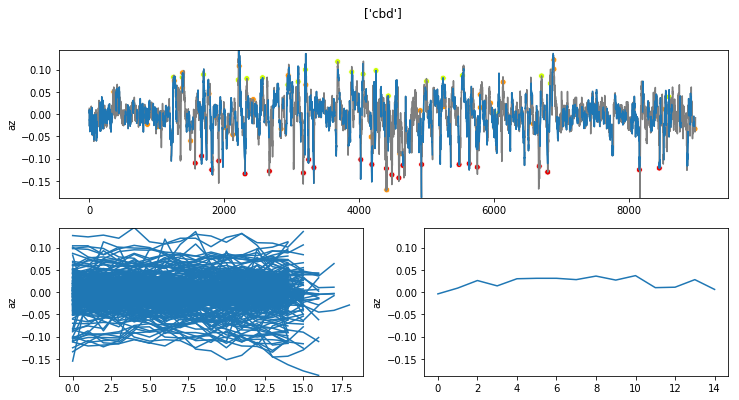

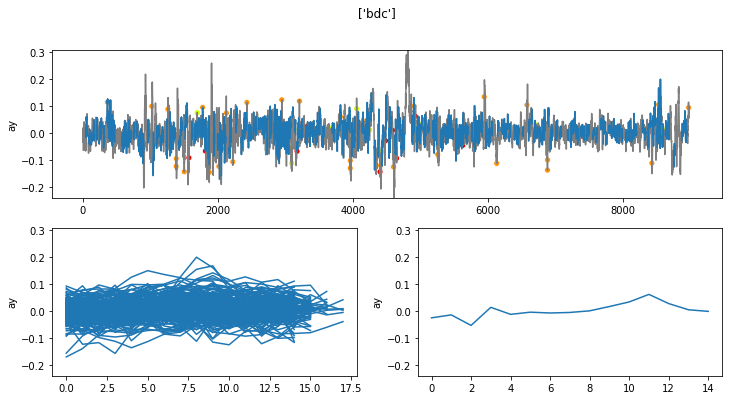

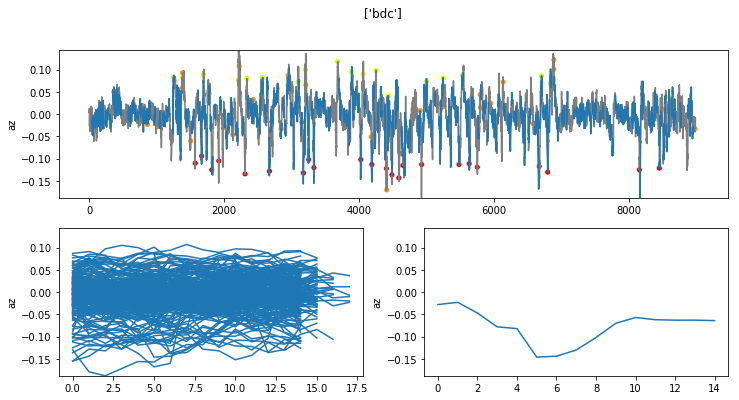

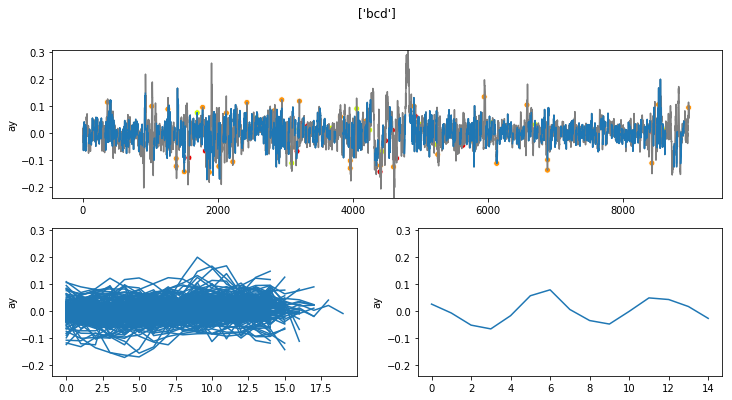

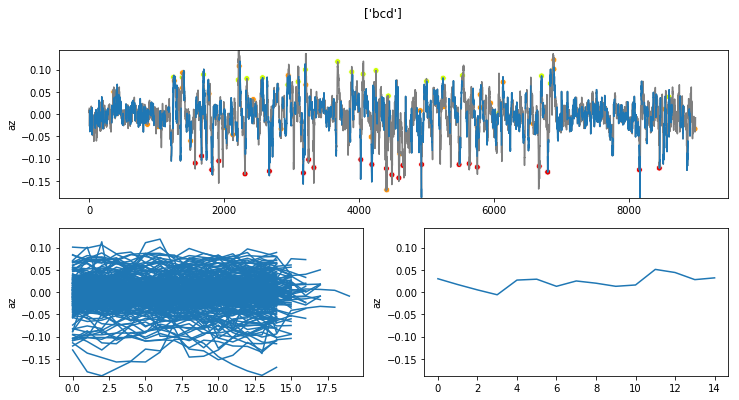

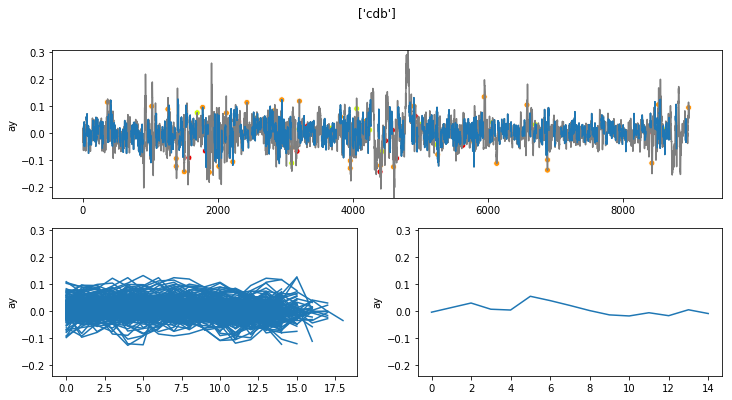

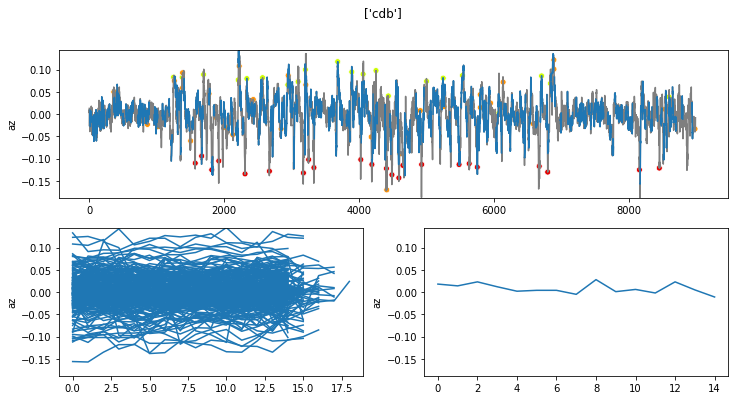

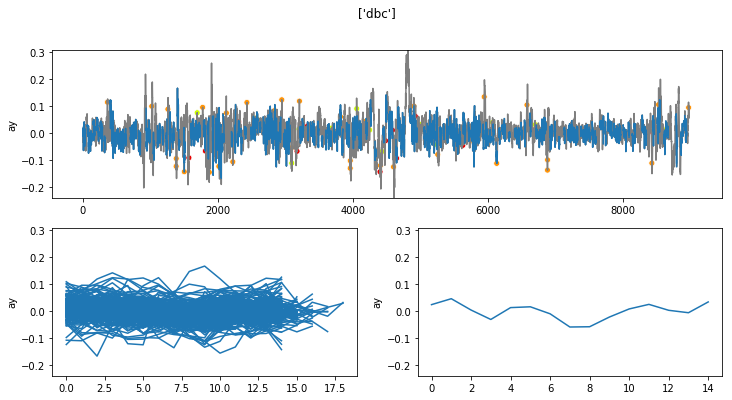

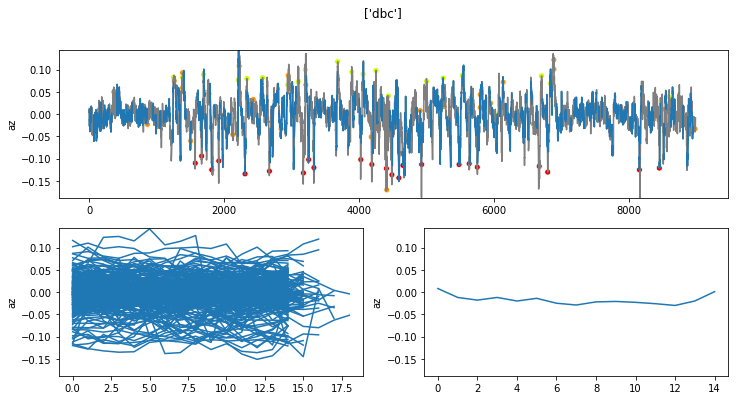

In [8]:
plot_k_multdim_motifs(5, multi_dim_ts, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)

***

## Experiment 2: Standard approach with fixed break point in the SAX transformation

In [9]:
folder = os.path.join(output_folder, 'trip_exp2')
ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist = load_motif_data(folder)
df2 = create_motif_table(pattern_list, motif_point_list, mdl_cost_list, mean_dist)
df2.head(10)

,pattern,pattern_len,n_members,mdl_cost,mean_dist
269,[ded],1,83,57437.7,0.059711
245,[cdd],1,85,57540.4,0.055325
80,[ddd],1,85,57560.0,0.052520
18,[ccd],1,86,57981.1,0.057987
182,[edd],1,78,58330.2,0.059818
23,[dcc],1,78,58360.4,0.059464
129,[ddc],1,77,58679.7,0.059987
89,[cdc],1,65,58932.5,0.060971
92,[cde],1,70,59286.1,0.068449
196,[dde],1,79,59314.2,0.058710


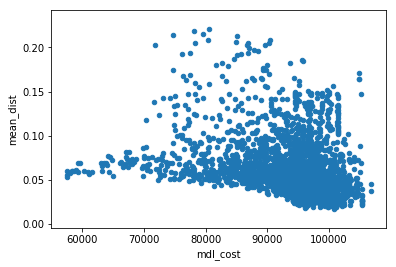

In [10]:
df2.plot.scatter('mdl_cost', 'mean_dist')
plt.show()

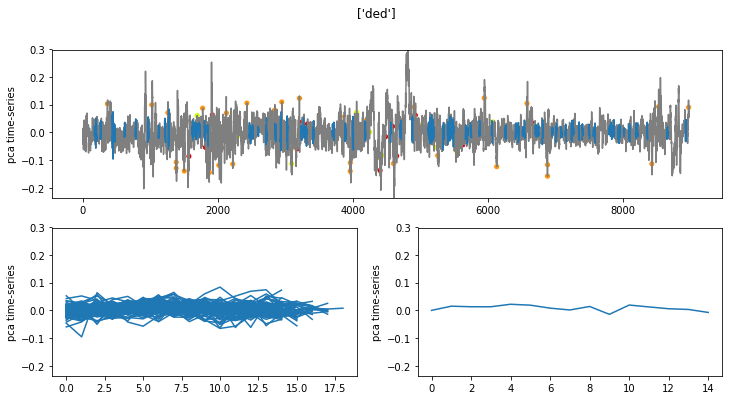

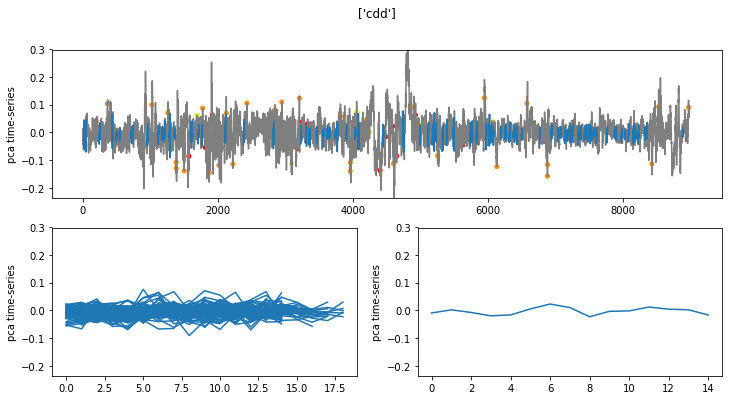

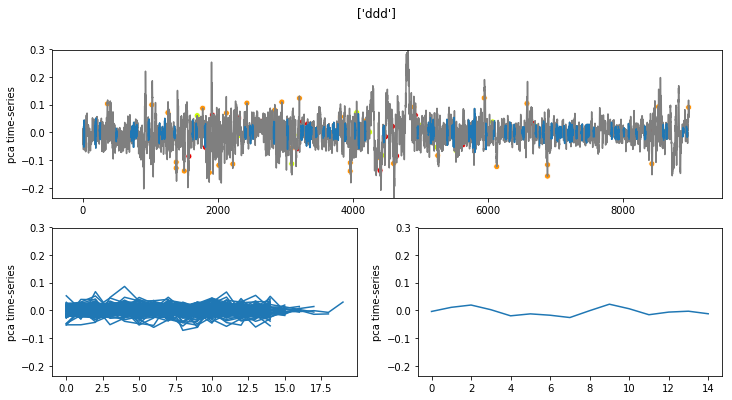

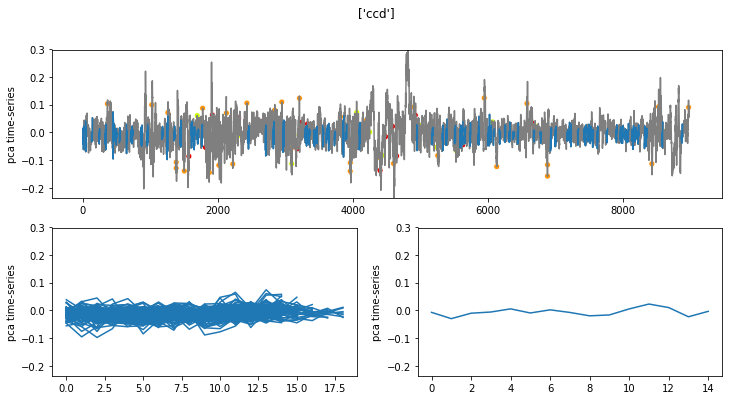

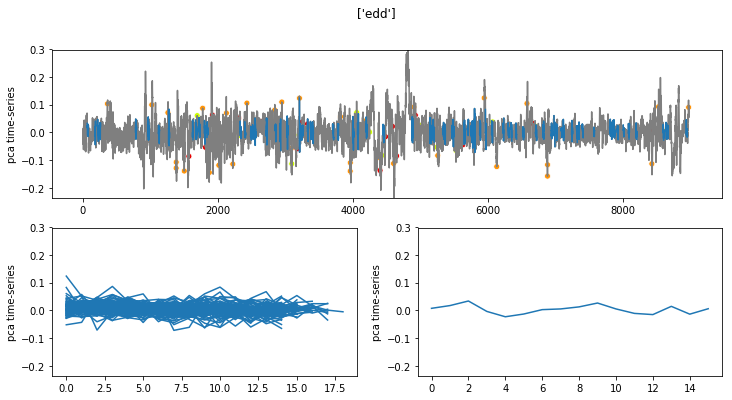

'Plot completed'

In [11]:
plot_k_motifs(5, ts_1d, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)

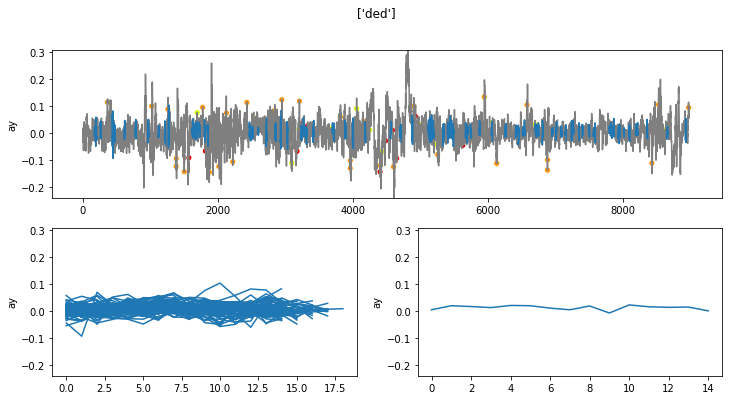

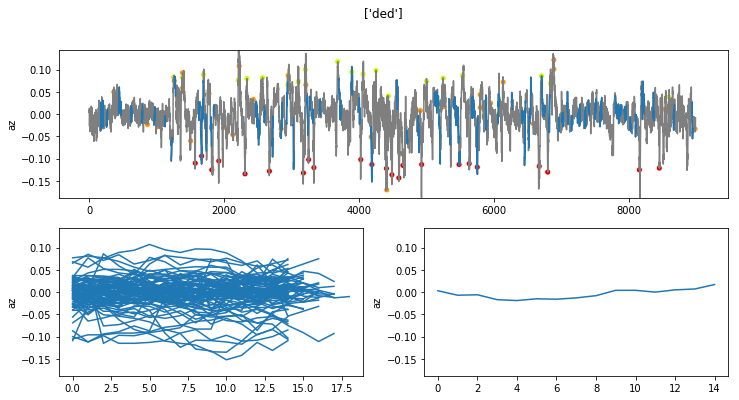

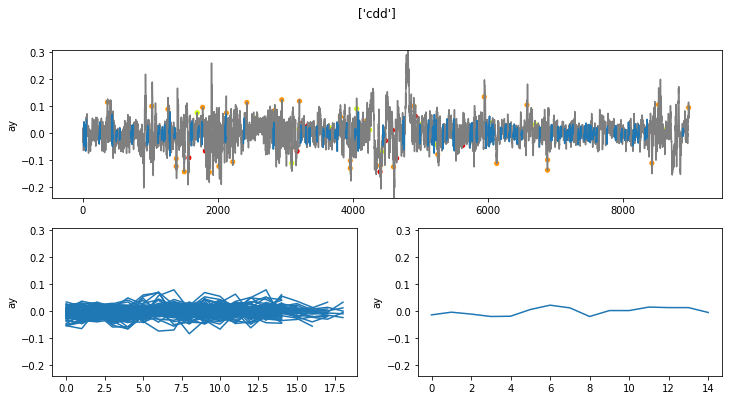

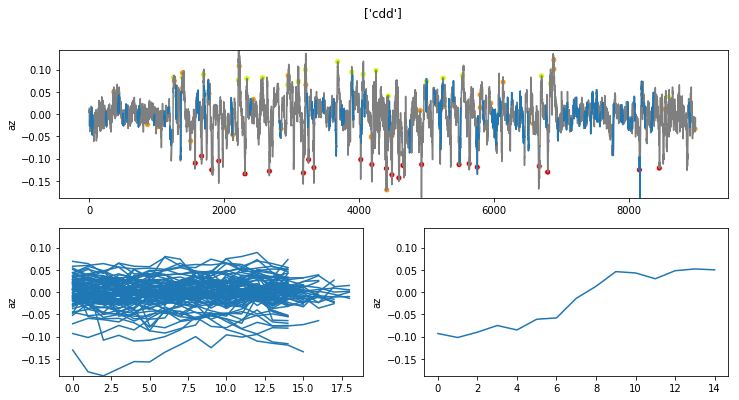

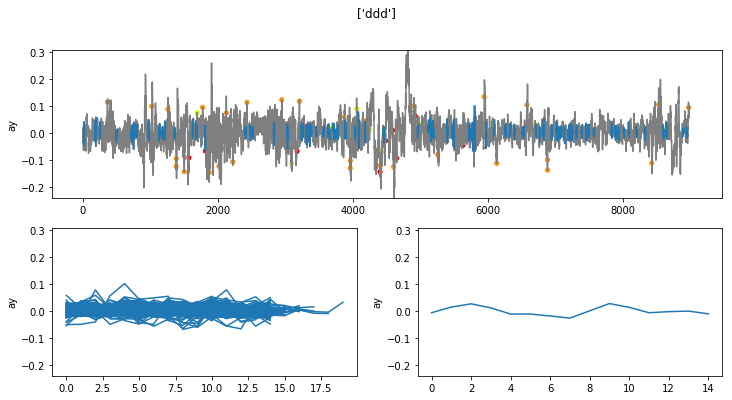

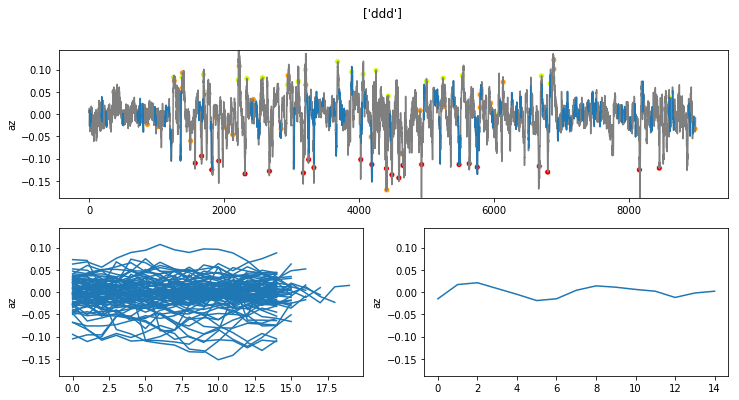

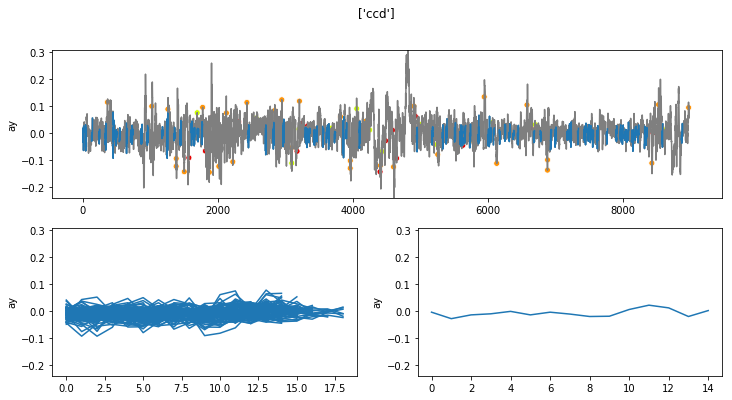

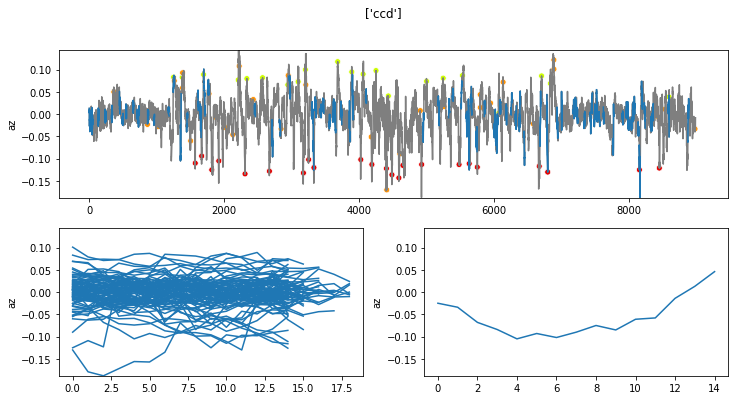

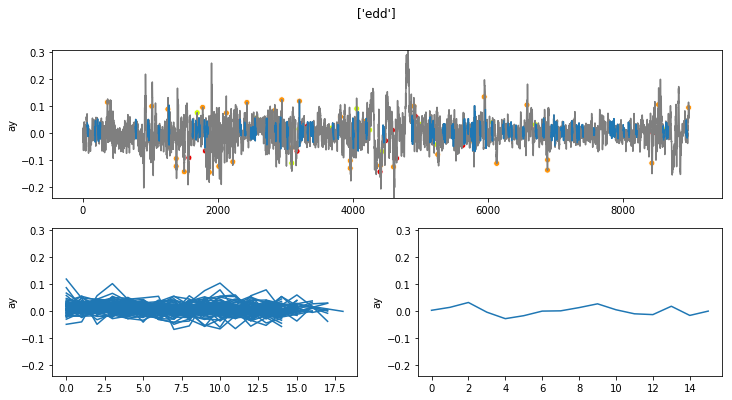

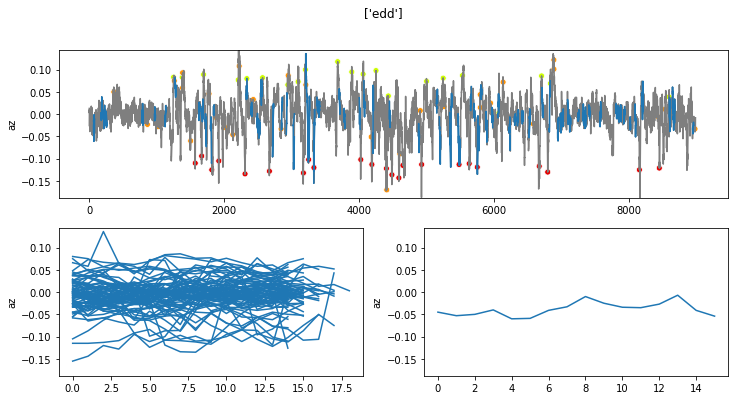

In [12]:
plot_k_multdim_motifs(5, multi_dim_ts, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)